In [1]:
# Automatically adjust notebook width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Allow interactive dislay of matplotlib features
%matplotlib ipympl

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from pathlib import Path
from scipy import signal

In [3]:
### Utility functions ###

# Reshape input data into a 2D array (similar to an image)
def reshape_data(data):
    x, y, z = data
    arr_in = np.vstack([x,y,z]).T
    # Create a grid out of the two 1D coordinates arrays
    x_range = np.unique(x)
    y_range = np.unique(y)
    xx, yy = np.meshgrid(x_range, y_range)
    # Create new data array
    arr_out = np.zeros((len(y_range), len(x_range)), dtype = float)
    # Assign main data points (z) to correct row/column
    for i, y_i in enumerate(y_range):
        for j, x_j in enumerate(x_range):
            coord = arr_in[np.where((arr_in[:,0] == x_j) * (arr_in[:,1] == y_i))]
            if np.any(coord):
                arr_out[i][j] = coord[0][2]
    return xx, yy, arr_out


# Plot data in the XY plane
def plot_data_2d(data):
    x1, y1, x2, y2 = data
    plt.close()
    plt.plot(x1, y1, 'r*', label='raw_0')
    plt.plot(x2, y2, 'b+', label='raw_1')
    plt.legend(loc="lower right", prop={'size': 9})
    plt.xlabel('x cooordinates')
    plt.ylabel('y cooordinates')
    plt.title('Distribution of data points in XY plane')
    plt.show()


# Plot data in 3D (with surface projection)
def plot_data_3d(fig, ind, data):
    x, y, z, xx, yy, arr = data
    ax = fig.add_subplot(int(f"12{ind}"), projection='3d')
    surf = ax.plot_surface(xx, yy, arr, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False,
                           shade=False, label='Surface projection')
    ax.scatter(x, y, z, color='black', s=20, label='data')
    ax.legend(loc="upper left", prop={'size': 10})
    ax.set_xlabel('x', fontsize=15)
    ax.set_ylabel('y', fontsize=15)
    ax.set_zlabel('z', fontsize=15)
    ax.title.set_text(f'3D plot of raw_{ind-1} (arr{ind})')


# Plot convolution results
def plot_convolution(results):
    xx, yy, conv = results
    plt.close()
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(xx, yy, conv, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False, shade=False)
    ax.set_xlabel('x', fontsize=15)
    ax.set_ylabel('y', fontsize=15)
    ax.set_zlabel('z', fontsize=15)
    ax.title.set_text('2-D convolution of raw0 and raw1')
    plt.show()


# Read/parse data
def read_input_data(path2data):
    arr = np.loadtxt(path2data)
    x, y, z = np.transpose(arr)
    return x, y, z

In [4]:
# Setting path to input datasets
path2data_1 = Path('./dataset/convolve_raw_0.dat')
path2data_2 = Path('./dataset/convolve_raw_1.dat')

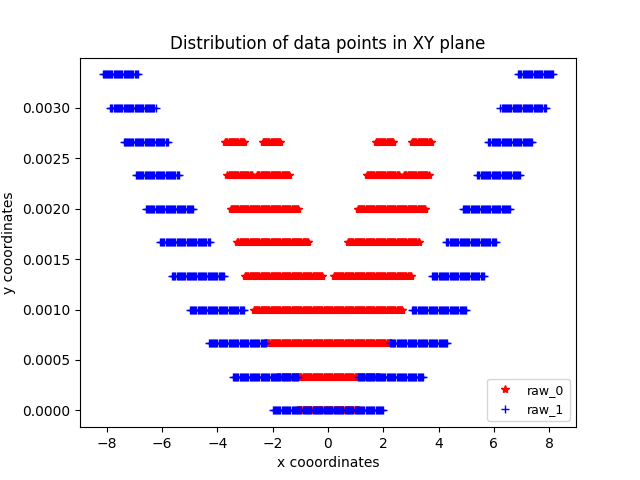

In [5]:
# Reading the data
x1, y1, z1 = read_input_data(path2data_1)
x2, y2, z2 = read_input_data(path2data_2)

# Plotting input data in 2D XY plane
plot_data_2d(data=[x1, y1, x2, y2])

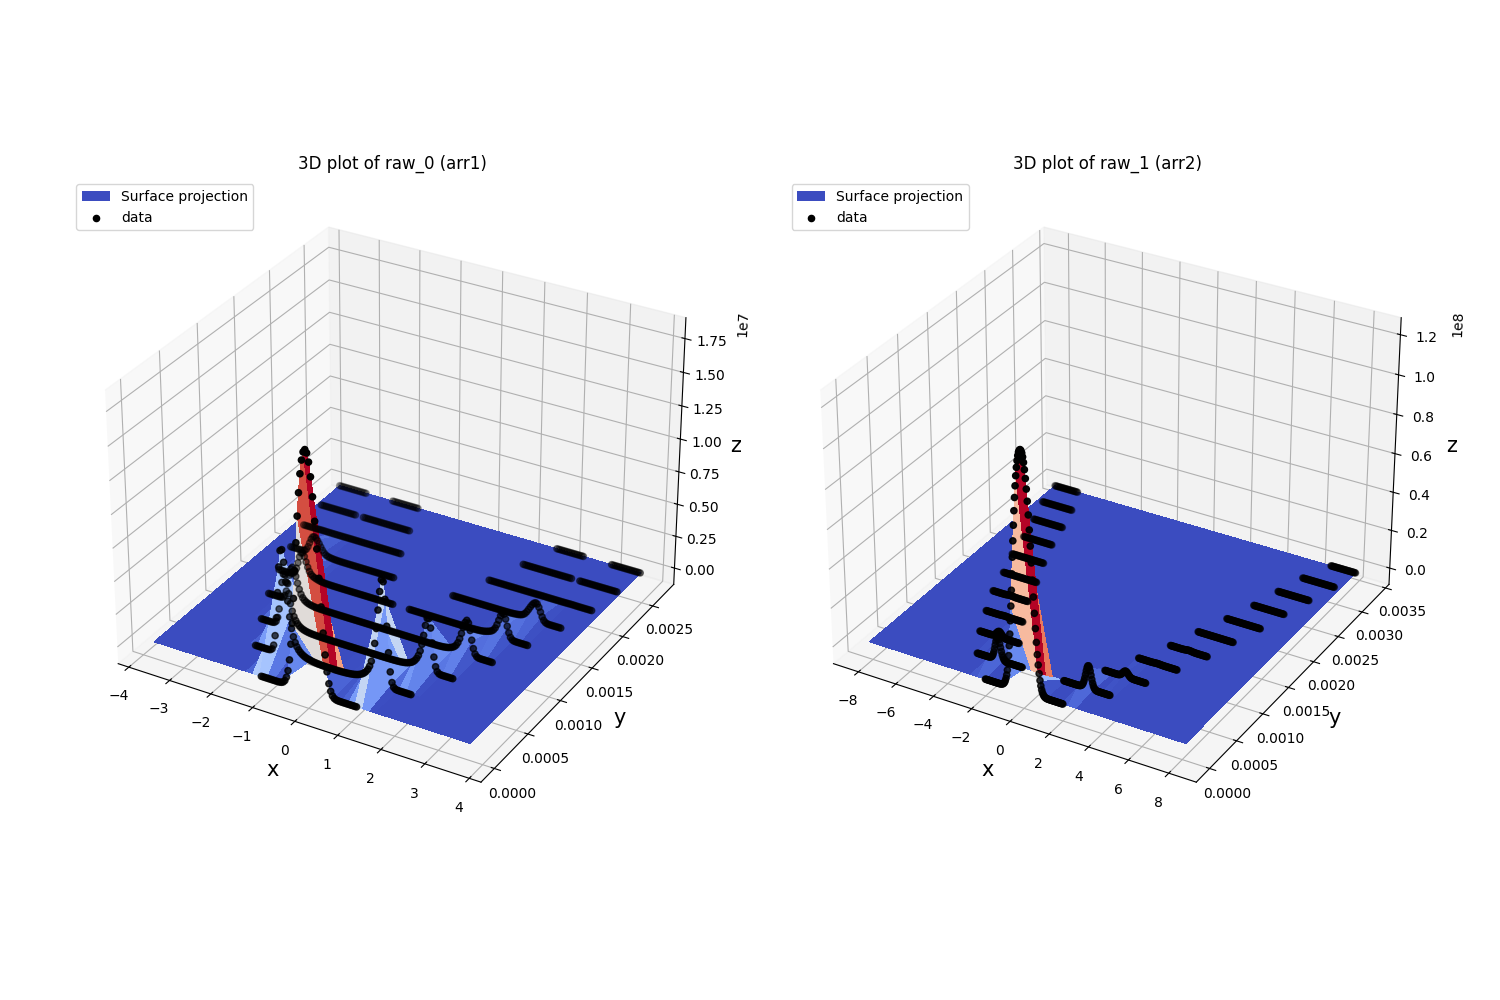

In [6]:
# Projecting input data into 2D arrays ("Create images")
xx1, yy1, arr1 = reshape_data(data=[x1, y1, z1])
xx2, yy2, arr2 = reshape_data(data=[x2, y2, z2])

# Plotting input data in 3D (XYZ)
plt.close()
fig = plt.figure(figsize=(15, 10))
plot_data_3d(fig, 1, data=[x1, y1, z1, xx1, yy1, arr1])
plot_data_3d(fig, 2, data=[x2, y2, z2, xx2, yy2, arr2])
fig.tight_layout(pad=5.0)
plt.show()

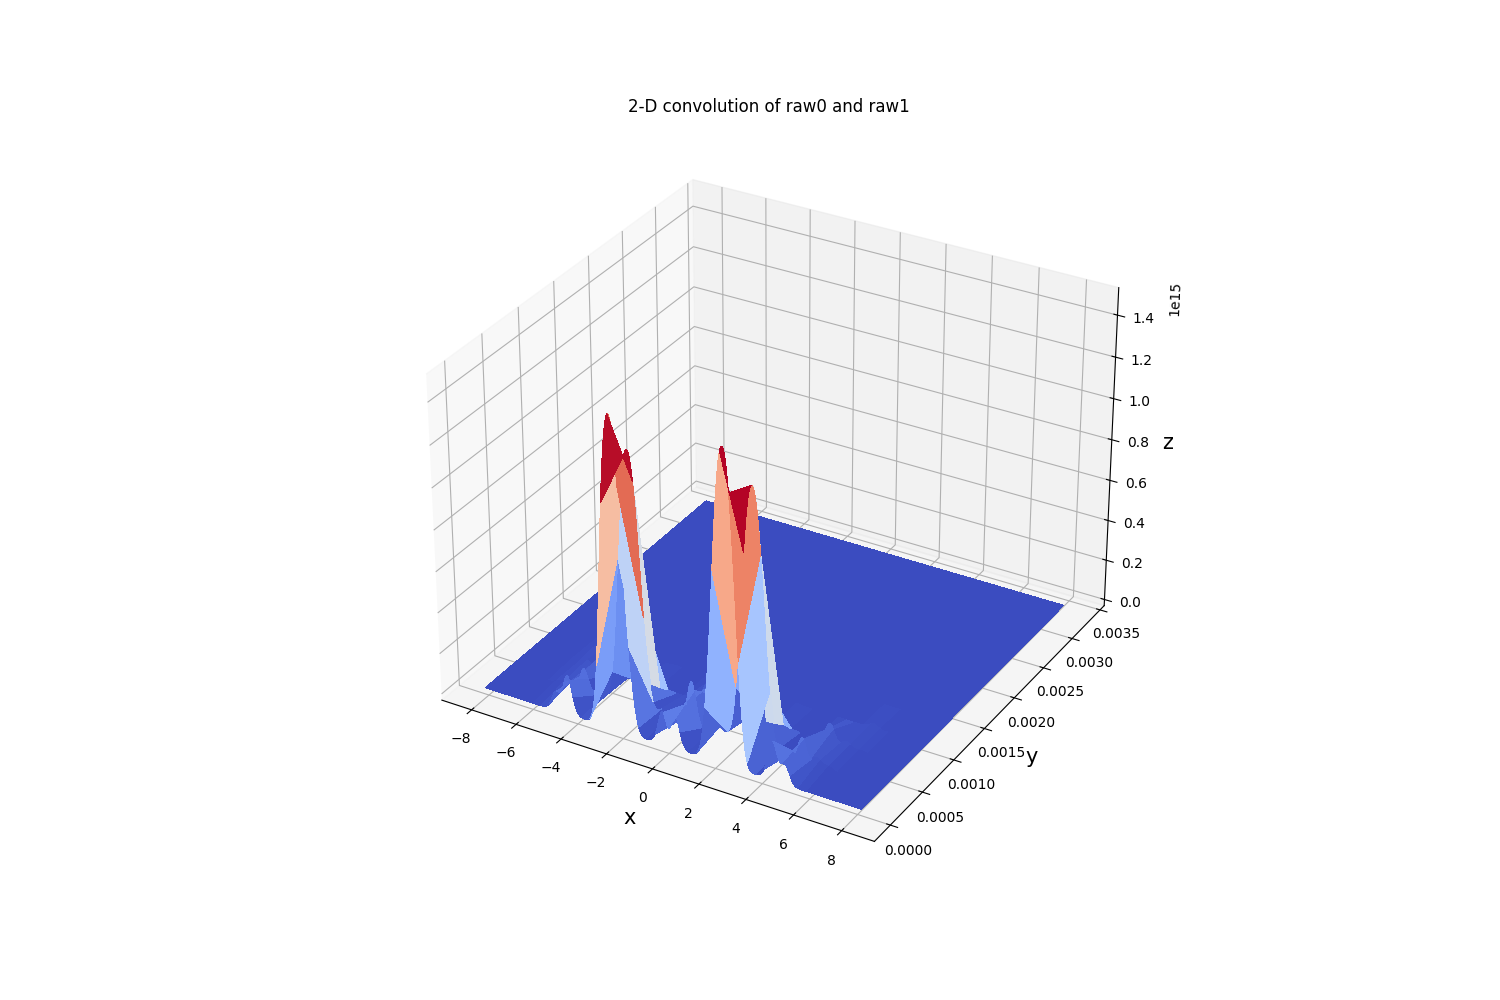

In [7]:
# Computing the 2-d convolution of the reshaped input arrays
conv = signal.convolve2d(arr2, arr1, mode='same')

# Plotting results of 2-d convolution as a 3D surface
plot_convolution(results=[xx2, yy2, conv])